<h1> The tweets</h1>
 <a href="http://fivethirtyeight.com/">most substantial impact on politics</a>), but I saw a hypothesis about Donald Trump’s Twitter account that simply begged to be investigated with data: </p>
<p><a href="https://twitter.com/tvaziri/status/762005541388378112"><img src="https://s3.amazonaws.com/assets.datacamp.com/production/project_511/img/tweet.png" alt="@tvaziri's hypothesis about Donald Trump’s Twitter account"></a>

In [1]:
# loading the needed libraries
library(tidyverse)
library(lubridate)

# Getting the data ready
tweet <- read_csv("trump_tweets.csv") %>%
filter(created_at >= "2015-06-01", created_at <= "2016-12-08")


tweet %>% head(20)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.1.1       ✔ purrr   0.3.2  
✔ tibble  2.1.1       ✔ dplyr   0.8.0.1
✔ tidyr   0.8.3       ✔ stringr 1.4.0  
✔ readr   1.3.1       ✔ forcats 0.4.0  
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘lubridate’

The following object is masked from ‘package:base’:

    date

Parsed with column specification:
cols(
  source = col_character(),
  id_str = col_double(),
  text = col_character(),
  created_at = col_datetime(format = ""),
  retweet_count = col_double(),
  in_reply_to_user_id_str = col_double(),
  favorite_count = col_double(),
  

source,id_str,text,created_at,retweet_count,in_reply_to_user_id_str,favorite_count,is_retweet
Twitter for Android,6.827032e+17,"I would like to wish everyone A HAPPY AND HEALTHY NEW YEAR. WE MUST ALL WORK TOGETHER TO, FINALLY, MAKE AMERICA SAFE AGAIN AND GREAT AGAIN!",2015-12-31 23:21:49,6776,NA,16495,FALSE
Twitter for Android,6.827007e+17,"Do you believe that The State Department, on NEW YEAR'S EVE, just released more of Hillary's e-mails. They just want it all to end. BAD!",2015-12-31 23:11:35,2755,NA,6824,FALSE
Twitter for iPhone,6.826351e+17,THANK YOU ILLINOIS! Let's not forget to get family &amp; friends- out to VOTE IN 2016! https://t.co/lg5kMbNLYK https://t.co/dtMAsIq4cf,2015-12-31 18:51:12,2468,NA,6047,FALSE
Twitter for iPhone,6.826053e+17,"HAPPY BIRTHDAY to my son, @DonaldJTrumpJr! Very proud of you! #TBT https://t.co/ULerCEOCGX https://t.co/nbxPVdarJM",2015-12-31 16:52:38,2080,NA,8416,FALSE
Twitter for Android,6.825788e+17,I would feel sorry for @JebBush and how badly he is doing with his campaign other than for the fact he took millions of $'s of hit ads on me,2015-12-31 15:07:18,1875,NA,5780,FALSE
Twitter for iPhone,6.825446e+17,#MakeAmericaGreatAgain #Trump2016 https://t.co/IEIXos0wh9,2015-12-31 12:51:35,2285,NA,5729,FALSE
Twitter for Android,6.825169e+17,"""@whispers34: Nevada Poll: Donald Trump 33%, Ted Cruz 20%, Marco Rubio 11%... https://t.co/Hniy4iAqNG via @thelastrefuge2"" Great news!",2015-12-31 11:01:18,1065,NA,2864,FALSE
Twitter for Android,6.825148e+17,"""@deggow: Just heard a 25 year old man say ""I would rather work for Donald Trump than Bernie Sanders""it's time for me to leave this party.""",2015-12-31 10:53:15,1432,NA,4581,FALSE
Twitter for Android,6.825132e+17,"""@wmsolomon: 'On Point' with Gov. Sarah Palin &amp; Donald Trump https://t.co/wPeScKLDs7""",2015-12-31 10:46:30,676,NA,2036,FALSE
Twitter for Android,6.825122e+17,"""@stylin1188: Donald Trump is running the most cost-effective presidential campaign in modern history https://t.co/iGyTDDEpbv"" Thank you!",2015-12-31 10:42:47,1321,NA,3610,FALSE


In [2]:
# From what source were most of the tweets coming from
tweet %>%
count(source)

source,n
Facebook,2
Instagram,47
Media Studio,1
Mobile Web (M5),1
Periscope,7
TweetDeck,2
Twitter Ads,64
Twitter Mirror for iPad,1
Twitter QandA,10
Twitter Web Client,1310


## A clean tweet is needed

<p>We'll clean the data by extracting the source application (showing which device did the tweet). A smaller number of the tweets came from Twitter Ads,  Instagram	 or  BlackBerry</p>

<p>The Overall cleaned data should include 1310 tweets from Web Client, 2314 tweets from iPhone and 4335 from Android</p>

In [3]:
# Clean the tweets
cleaned_tweet <- tweet %>%
select(id_str, source, created_at, text, )%>%
filter(source %in% c("Twitter for iPhone", "Twitter for Android", "Twitter Web Client"))%>%
extract(source, "source", "(\\w+)$")

# view the first six rows
cleaned_tweet %>% head()

id_str,source,created_at,text
6.827032e+17,Android,2015-12-31 23:21:49,"I would like to wish everyone A HAPPY AND HEALTHY NEW YEAR. WE MUST ALL WORK TOGETHER TO, FINALLY, MAKE AMERICA SAFE AGAIN AND GREAT AGAIN!"
6.827007e+17,Android,2015-12-31 23:11:35,"Do you believe that The State Department, on NEW YEAR'S EVE, just released more of Hillary's e-mails. They just want it all to end. BAD!"
6.826351e+17,iPhone,2015-12-31 18:51:12,THANK YOU ILLINOIS! Let's not forget to get family &amp; friends- out to VOTE IN 2016! https://t.co/lg5kMbNLYK https://t.co/dtMAsIq4cf
6.826053e+17,iPhone,2015-12-31 16:52:38,"HAPPY BIRTHDAY to my son, @DonaldJTrumpJr! Very proud of you! #TBT https://t.co/ULerCEOCGX https://t.co/nbxPVdarJM"
6.825788e+17,Android,2015-12-31 15:07:18,I would feel sorry for @JebBush and how badly he is doing with his campaign other than for the fact he took millions of $'s of hit ads on me
6.825446e+17,iPhone,2015-12-31 12:51:35,#MakeAmericaGreatAgain #Trump2016 https://t.co/IEIXos0wh9


## Lets explore the time of posting

<p> Some people are creature of habits, which means their tweets could follow a specific culture ot timing. Most tweets from the Android are in the early morning or later in the evening, Tweets from web clients are mostly in the evening or at night while tweets from the iPhone occur more often in the afternoon.</p>

In [4]:
cleaned_tweet %>%
count(source)

source,n
Android,4335
Client,1310
iPhone,2314


In [5]:
cleaned_tweet %>%
filter(source=="Client") %>%
head(7)

id_str,source,created_at,text
6.819177e+17,Client,2015-12-29 19:20:15,We need a real President! https://t.co/nw7BIAW7HV
6.819101e+17,Client,2015-12-29 18:50:05,"Looking forward to being in Council Bluffs, Iowa, later today. Despite weather, rally is on -- will be fantastic! #MakeAmericaGreatAgain!"
6.794124e+17,Client,2015-12-22 21:25:08,".@JebBush's opening and closing in the debate were said by all to be terrible--fumbled around, incoherent."
6.794121e+17,Client,2015-12-22 21:23:57,"Why doesn't @JebBush, in his ads, show my answer to his statement in the debate?"
6.794118e+17,Client,2015-12-22 21:22:50,"Will @JebBush, in his phony advertising campaign, show himself asking me to apologize to his wife in the debate?"
6.794112e+17,Client,2015-12-22 21:20:33,.@JebBush just took millions of $'s in special interest money to look like a tough guy. Will never work!
6.794109e+17,Client,2015-12-22 21:19:16,"Weak and low energy @JebBush, whose campaign is a disaster, is now doing ads against me where he tries to look like a tough guy."



Attaching package: ‘scales’

The following object is masked from ‘package:purrr’:

    discard

The following object is masked from ‘package:readr’:

    col_factor



$title
[1] "Cleaned data plot"

attr(,"class")
[1] "labels"

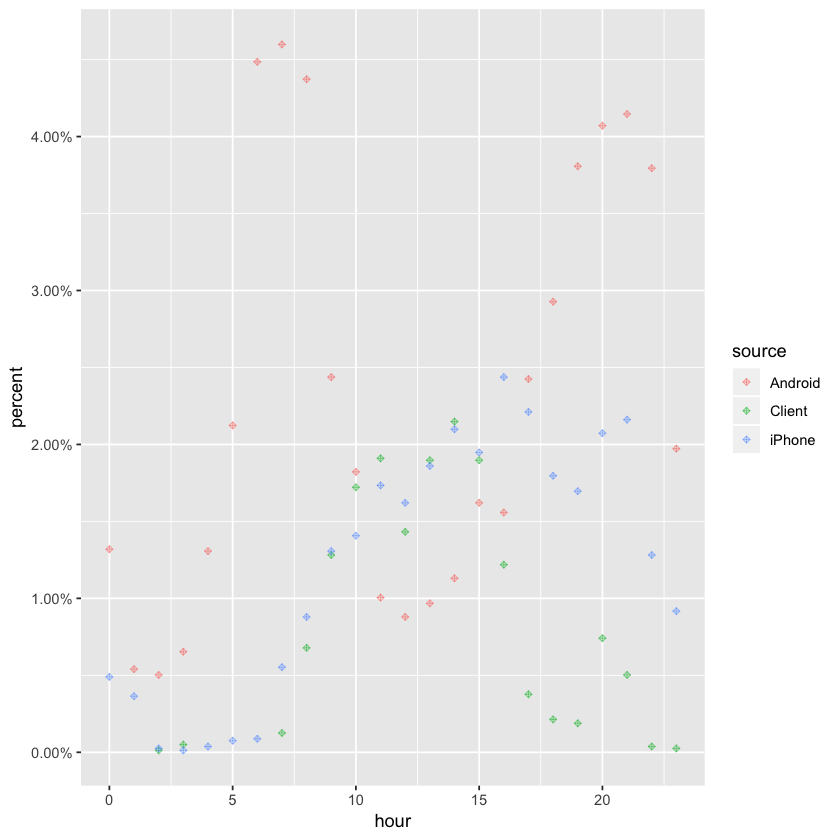

In [6]:
# load the scale package 
library(scales)

#  Plot the percentage of tweets by hour of the day for each device
cleaned_tweet %>%
count(source, hour=hour(with_tz(created_at, "EST"))) %>%
mutate(percent = n/sum(n)) %>%
ggplot(aes(hour, percent, col=source))+
geom_point(size=1, alpha=0.5, shape=9,)+
scale_y_continuous(labels = percent_format())+
labs(labs(x="Hour of day (EST)" ,y="% of tweets", color=" "))
ggtitle("Cleaned data plot")


In [7]:
cleaned_tweet %>%
count(source, quoted = ifelse(str_detect(text, '^"'), "Quoted", "Not Quoted"))

source,quoted,n
Android,Not Quoted,1949
Android,Quoted,2386
Client,Not Quoted,1089
Client,Quoted,221
iPhone,Not Quoted,2267
iPhone,Quoted,47


##  The quote tweet is dead
<p>Another place we can spot a difference is in Trump’s anachronistic behavior of “manually retweeting” people by copy-pasting their tweets, then surrounding them with quotation marks. These are known as <a href="https://www.theringer.com/tech/2018/5/2/17311616/twitter-retweet-quote-endorsement-function-trolls">quote tweets</a>.</p>
<p><a href="https://twitter.com/realDonaldTrump/status/758512401629192192"><img src="https://s3.amazonaws.com/assets.datacamp.com/production/project_511/img/tweet_quotes.png" alt="Trump quote-tweeting someone"></a></p>
<p>Almost all the quote tweets are posted from the Android.</p>
<p>After this plot, we’ll filter out the quote tweets in the remaining <strong>by-word</strong> analyses because they contain text from followers that may not be representative of Trump’s tweets.</p>

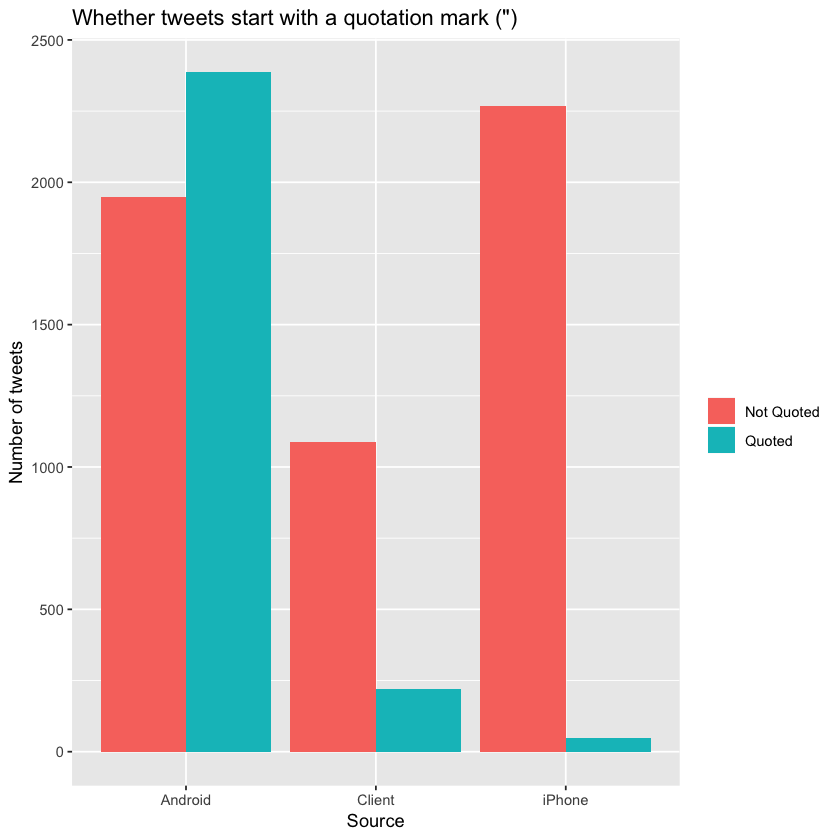

In [8]:
#  Plot the number of tweets with and without quotes by device
cleaned_tweet %>%
count(source, Quoted = ifelse(str_detect(text, '^"'), "Quoted", "Not Quoted"))%>%
ggplot(aes(source, n, fill=Quoted))+
geom_bar(stat="identity", position="dodge")+
labs(x="Source", y="Number of tweets", fill ="")+
ggtitle('Whether tweets start with a quotation mark (")')

##  Links and pictures
<p>Another place we see a difference between the iPhone and Android tweets is in the sharing of links or pictures.</p>
<p>It turns out that tweets from the iPhone were <strong>way more likely to contain either a picture or a link</strong>. This also makes sense with our narrative: iPhone (presumably run by the campaign) tends to write “announcement” tweets about events, like this:</p>
<p><a href="https://twitter.com/realDonaldTrump/status/762110918721310721"><img src="https://s3.amazonaws.com/assets.datacamp.com/production/project_511/img/tweet_windham.png" alt="&quot;Thank you Windham, New Hampshire!&quot;"></a></p>
<p>While Android (Trump himself) tends to write picture-less tweets like:</p>
<p><a href="https://twitter.com/realDonaldTrump/status/762400869858115588"><img src="https://s3.amazonaws.com/assets.datacamp.com/production/project_511/img/tweet_media.png" alt="&quot;The media is going crazy...very dishonest!&quot;"></a></p>

source,pictures,n
Android,No Picture,1894
Android,Picture/link,55
Client,No Picture,555
Client,Picture/link,534
iPhone,No Picture,713
iPhone,Picture/link,1554


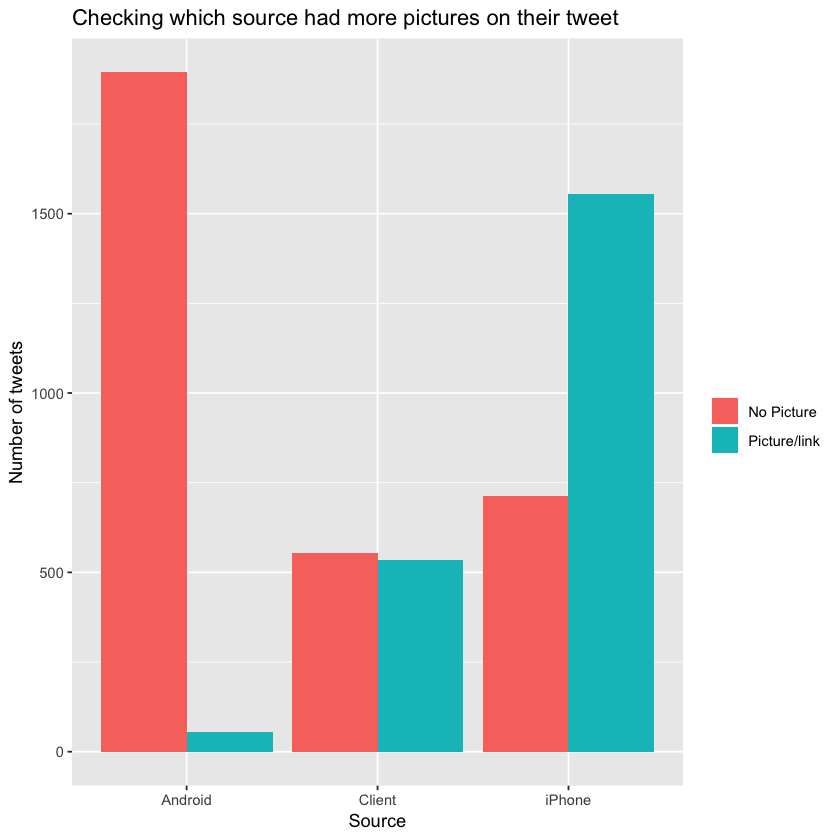

In [9]:
tweet_picture_counts <- cleaned_tweet %>%
filter(!str_detect(text, '^"')) %>%
count(source, pictures = ifelse(str_detect(text, "t.co"), "Picture/link", "No Picture"))

# Make a bar plot
ggplot(tweet_picture_counts, aes(source,n, fill=pictures))+
geom_bar(stat="identity", position="dodge")+
labs(x="Source", y="Number of tweets", fill="")+
ggtitle("Checking which source had more pictures on their tweet")

tweet_picture_counts

## Comparison of words
<p>Now that we’re sure there is a difference between these two platforms, what can we say about the difference in the <em>content</em> of the tweets? We’ll use the <a href="https://cran.r-project.org/web/packages/tidytext">tidytext package</a> that <a href="http://juliasilge.com/">Julia Silge</a> and I developed.</p>
<p>We start by dividing lines of text into individual words using <code>unnest_tokens()</code> (see <a href="https://cran.r-project.org/web/packages/tidytext/vignettes/tidytext.html">this vignette</a> for more), and by removing some common “stopwords”.</p>

In [11]:
# Load the tidytext package
library(tidytext)

# Create a regex pattern
reg <- "([^A-Za-z\\d#@']|'(?![A-Za-z\\d#@]))"
#soln_tweet_words
# Unnest the text strings into a data frame of words
tweet_words <- cleaned_tweet %>%
  filter(!str_detect(text, '^"')) %>%
  mutate(text = str_replace_all(text, "https://t.co/[A-Za-z\\d]+|&amp;", "")) %>%
  unnest_tokens(word, text, token = "regex", pattern = reg) %>%
  filter(!word %in% stop_words$word,
         str_detect(word, "[a-z]"))

# Inspect the first six rows of tweet_words
head(tweet_words)

id_str,source,created_at,word
6.053187e+17,Android,2015-06-01 10:23:13,@foxandfriends
6.053187e+17,Android,2015-06-01 10:23:13,enjoy
6.053766e+17,Client,2015-06-01 14:13:26,jon
6.053766e+17,Client,2015-06-01 14:13:26,stewart
6.053766e+17,Client,2015-06-01 14:13:26,overrated
6.053766e+17,Client,2015-06-01 14:13:26,joke


##  Most common words
<p>What are the most common words @realDonaldTrump tweets? This plot should look familiar to anyone who has seen the feed.</p>

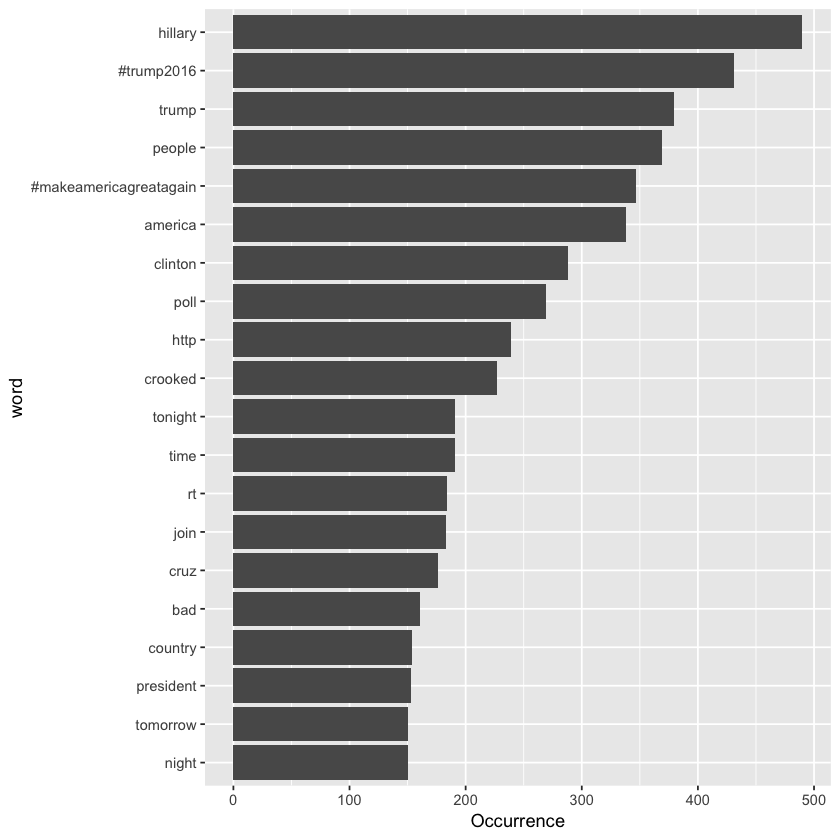

In [12]:
# Plot the most common words from @realDonaldTrump tweets
tweet_words %>%
count(word, sort = T) %>%
head(20) %>%
mutate(word = reorder(word, n))%>%
ggplot( aes(word, n))+
geom_bar(stat='identity', position="dodge")+
ylab("Occurrence") +
coord_flip()
